Text(0.5, 1.0, 'Valores por tratamientos')

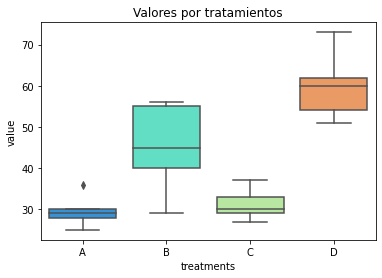

In [6]:
import numpy as np
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt

df = pd.read_csv("Libro2.csv")

sn.boxplot(x='treatments',y='value',data=df,palette='rainbow')
plt.title("Valores por tratamientos")

In [7]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

model = ols('value ~ C(treatments)',data=df).fit()
anova_table = sm.stats.anova_lm(model,typ=2)
anova_table

,sum_sq,df,F,PR(>F)
C(treatments),3010.95,3.0,17.49281,0.000026
Residual,918.00,16.0,NaN,NaN


In [8]:
from bioinfokit.analys import stat
res = stat()
res.anova_stat(df=df,res_var='value',anova_model='value ~ C(treatments)')
res.anova_summary

,df,sum_sq,mean_sq,F,PR(>F)
C(treatments),3.0,3010.95,1003.650,17.49281,0.000026
Residual,16.0,918.00,57.375,NaN,NaN


In [9]:
res.tukey_hsd(df=df,res_var='value',xfac_var='treatments',anova_model='value ~ C(treatments)')
res.tukey_summary
# p-value 0.001 from tukey-hsd output should be interpreted as <= 0.001

c:\Users\42mar\AppData\Local\Programs\Python\Python310\lib\site-packages\bioinfokit\analys.py:402: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  mult_group[ele] = df[df[xfac_var] == ele].mean().loc[res_var]


,group1,group2,Diff,Lower,Upper,q-value,p-value
0,A,B,15.4,1.692871,29.107129,4.546156,0.025070
1,A,C,1.6,-12.107129,15.307129,0.472328,0.900000
2,A,D,30.4,16.692871,44.107129,8.974231,0.001000
3,B,C,13.8,0.092871,27.507129,4.073828,0.048178
4,B,D,15.0,1.292871,28.707129,4.428074,0.029578
5,C,D,28.8,15.092871,42.507129,8.501903,0.001000


Anova multivariable

In [10]:
import statsmodels.api as sm
from statsmodels.formula.api import ols
df = pd.read_csv("TwoWayAnova.csv")
model = ols('value ~ C(Genotype) + C(year) + C(Genotype):C(year)',data=df).fit()
anova_table = sm.stats.anova_lm(model,type=2)
anova_table

,df,sum_sq,mean_sq,F,PR(>F)
C(Genotype),5.0,58.551733,11.710347,32.748581,1.931655e-12
C(year),2.0,278.925633,139.462817,390.014868,4.006243e-25
C(Genotype):C(year),10.0,17.122967,1.712297,4.788525,2.230094e-04
Residual,36.0,12.873000,0.357583,NaN,NaN


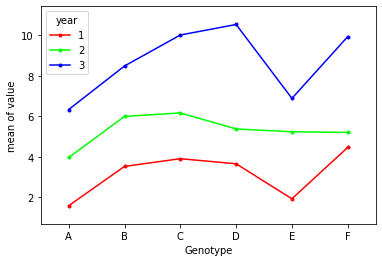

In [11]:
from statsmodels.graphics.factorplots import interaction_plot
import matplotlib.pyplot as plt
fig = interaction_plot(x=df['Genotype'],trace=df['year'],response=df['value'])
plt.show()